# Exam matr. 501019

## Weather forecasting through machine learning 

steps done:

1: data preprocessing: row removal and imputation

2: model selection

3: performance evaluation

## Beginning

Dataset taken from Kaggle

link: https://www.kaggle.com/datasets/grubenm/austin-weather

the below instructions are needed for being able to import the Xgboost ensable learning method (even if never used, because of timing purposes)

In [1]:
!pip install xgboost==1.7.3

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#all the needed imports
import pandas as pd
import numpy as np
import itertools

from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import Perceptron, LogisticRegression
from scipy.stats import loguniform, beta, uniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import matplotlib as mlp



import matplotlib.pyplot as plt
import warnings













loading the dataset

In [3]:
#loading dataset
df= pd.read_csv('austin_weather 2.csv')
df.columns # debug log


Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

## data preprocessing analysis

The chosen dataset, unfortunately, is full of 'hidden' missing data: wherever there is the value "-", it's a missing datum and we need to impute/remove

In [4]:
df.replace(to_replace='-',value=np.nan, inplace=True) #this is for the method "isnull()" to work 4all df
df['Events']=df['Events'].replace(to_replace=' ',value='SUNNY')
df.columns # debug log


Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

in the above block I replaced the missing values in the 'Events' column with the value 'SUNNY' because the dataset, by design, only includes dynamical phenomena. 

In [5]:

for colname in df.columns:
    print(f'{colname}', [df[colname].unique()])
df.columns #debug log to better visualize 'dirty' data

Date [array(['2013-12-21', '2013-12-22', '2013-12-23', ..., '2017-07-29',
       '2017-07-30', '2017-07-31'], dtype=object)]
TempHighF [array([ 74,  56,  58,  61,  57,  60,  62,  64,  44,  55,  69,  71,  59,
        36,  48,  53,  70,  72,  75,  67,  76,  82,  63,  40,  39,  49,
        65,  80,  46,  32,  38,  86,  81,  83,  77,  52,  73,  47,  50,
        68,  66,  89,  79,  85,  84,  87,  78,  88,  96,  93,  94,  91,
        92,  90,  95,  97,  98, 100, 101,  99, 102, 104, 103,  51,  41,
        45,  54,  42,  43,  37, 105,  34, 107, 106])]
TempAvgF [array([60, 48, 45, 46, 50, 53, 51, 40, 54, 44, 43, 57, 47, 29, 35, 62, 65,
       52, 56, 59, 64, 42, 33, 38, 68, 66, 34, 67, 70, 69, 73, 63, 74, 36,
       49, 61, 55, 58, 72, 76, 77, 75, 78, 85, 80, 79, 83, 81, 82, 92, 84,
       86, 87, 88, 90, 89, 91, 71, 39, 37, 41, 30, 32, 93])]
TempLowF [array([45, 39, 32, 31, 41, 40, 36, 35, 33, 28, 42, 34, 22, 53, 57, 48, 46,
       43, 37, 38, 27, 26, 55, 29, 47, 59, 58, 63, 62, 52, 44, 24, 30

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

let's look for true missing data:

In [6]:
print("how many rows own a certain field as empty: \n",df.isnull().sum())
df.columns


how many rows own a certain field as empty: 
 Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
PrecipitationSumInches         0
Events                         0
dtype: int64


Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

### row removal

I decided to keep records with at least 10 filled columns [they carry at least 11/21=52% of information] in the below block.


In [7]:
print(df.shape)
df=df.dropna(axis=0,thresh=11)
print(df.shape) # i removed 2 rows, the rest can be reclaimed (bonificato)
df.columns

(1319, 21)
(1317, 21)


Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

### data imputation strategy

analysing features:

- PrecipitationSumInches:  the value 'T' [stands for "Trace"] in meteorology means a positive value, but too few to be measured by sensors. There's a big difference in weather conditions between a close-to-zero value versus pure zero value. Since this is an important difference, I will not replace 'T' by zero, instead i give it a low value equal to 0.001. this operation could be also performed via a SK-learn SimpleImputer(), but to be able to inspect data changes via pandas Dataframe I did it in the following way:

In [8]:
df['PrecipitationSumInches'].replace(to_replace='T',value=0.001, inplace=True)
df #visualization purposes


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,SUNNY
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,SUNNY
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,SUNNY
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,0.001,SUNNY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,SUNNY
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,SUNNY
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,SUNNY
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,SUNNY


the remaining feature are: 

- DewPointHighF, DewPointAvgF, DewPointLowF, [The dew point is the temperature to which air must be cooled to become saturated with water vapor, assuming constant air pressure and water content.] the values are expressed in Farenheit deg.

-  HumidityHighPercent, HumidityAvgPercent, HumidityLowPercent, [The humidity percentage refers to the relative humidity (RH) expected at a given place at a given time, above 60 percent is considered high humidity]

- SeaLevelPressureHighInches, SeaLevelPressureAvgInches, SeaLevelPressureLowInches, [This is the pressure reading most commonly used by meteorologists to track weather systems at the surface.]

- VisibilityHighMiles, VisibilityAvgMiles, VisibilityLowMiles [Visibility is a measure of the horizontal opacity of the atmosphere at the point of observation and is expressed in terms of the horizontal distance at which a person should be able to see]

- WindGustMPH is a sudden and brief increase in speed of the wind.

### moreover:

for rows having the quantities of DewPoint, Humidity, Pressure and visibility with the upper and lower bound missing, I fill those features with the Avarage column of the same record [sensible choice because data are from the same measurement for context preservation purposes, instead filling them with data combinations from different measurements].

 If the avarage field is empty too, then the values will be taken from the mean values for each column of the dataset [there is the need to have data filled for ML algorithm to work], done via SK-learn ColumnTransformer.

In [9]:
#for rows having the quantities of DewPoint, Humidity, Pressure and visibility with the upper
#and lower bound missing, I fill those features with the Avarage column of the same record

counter =0

for index, row in df.iterrows():

#temperature
    if(str(row['TempLowF'])=="nan" 
    and str(row['TempHighF'])=="nan"
    and str(row['TempAvgF'])!="nan"):

        df.at[index,'TempLowF'] = row['TempAvgF']
        df.at[index,'TempHighF'] = row['TempAvgF']
        counter=counter+1

#dewpoint
    if(str(row['DewPointLowF'])=="nan" 
    and str(row['DewPointHighF'])=="nan"
    and str(row['DewPointAvgF'])!="nan"):

        df.at[index,'DewPointLowF'] = row['DewPointAvgF']
        df.at[index,'DewPointHighF'] = row['DewPointAvgF']
        counter=counter+1

#visibility
    if(str(row['VisibilityHighMiles'])=="nan" 
    and str(row['VisibilityLowMiles'])=="nan"
    and str(row['VisibilityAvgMiles'])!="nan"):

        df.at[index,'VisibilityHighMiles'] = row['VisibilityAvgMiles']
        df.at[index,'VisibilityLowMiles'] = row['VisibilityAvgMiles']
        counter=counter+1

#seaLevelPressure
    if(str(row['SeaLevelPressureLowInches'])=="nan" 
    and str(row['SeaLevelPressureHighInches'])=="nan"
    and str(row['SeaLevelPressureAvgInches'])!="nan"):

        df.at[index,'SeaLevelPressureLowInches'] = row['SeaLevelPressureAvgInches']
        df.at[index,'SeaLevelPressureHighInches'] = row['SeaLevelPressureAvgInches']
        counter=counter+1


#Humidity
    if(str(row['HumidityLowPercent'])=="nan" 
    and str(row['HumidityHighPercent'])=="nan"
    and str(row['HumidityAvgPercent'])!="nan"):

        df.at[index,'HumidityLowPercent'] = row['HumidityAvgPercent']
        df.at[index,'HumidityHighPercent'] = row['HumidityAvgPercent']
        counter=counter+1


#Wind
    if(str(row['WindHighMPH'])=="nan" 
    and str(row['WindAvgMPH'])!="nan"):

        df.at[index,'WindHighMPH'] = row['WindAvgMPH']
        counter=counter+1

print(counter)
df
# I know nothing has changed, as witnessed by the var counter, but it's a political choice



0


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,SUNNY
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,SUNNY
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,SUNNY
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,0.001,SUNNY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,SUNNY
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,SUNNY
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,SUNNY
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,SUNNY


divide the dataset into independent variables, that is the matrix X,  and dependent variables that is the vector y, that is the label column

In [10]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder() #needed to transform word labels into numbers
le.fit(df['Events'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) #needed next in the error analysis part
y = le.transform(df['Events'])

print(y) # debug log



X=df.drop(columns='Events')
for colname in X.columns:
    print(f'{colname}', [X[colname].unique()]) # debug log
X.columns

[6 7 7 ... 7 7 7]
Date [array(['2013-12-21', '2013-12-22', '2013-12-23', ..., '2017-07-29',
       '2017-07-30', '2017-07-31'], dtype=object)]
TempHighF [array([ 74,  56,  58,  61,  57,  60,  62,  64,  44,  55,  69,  71,  59,
        36,  48,  53,  70,  72,  75,  67,  76,  82,  63,  40,  39,  49,
        65,  80,  46,  32,  38,  86,  81,  83,  77,  52,  73,  47,  50,
        68,  66,  89,  79,  85,  84,  87,  78,  88,  96,  93,  94,  91,
        92,  90,  95,  97,  98, 100, 101,  99, 102, 104, 103,  51,  41,
        45,  54,  42,  43,  37, 105,  34, 107, 106])]
TempAvgF [array([60, 48, 45, 46, 50, 53, 51, 40, 54, 44, 43, 57, 47, 29, 35, 62, 65,
       52, 56, 59, 64, 42, 33, 38, 68, 66, 34, 67, 70, 69, 73, 63, 74, 36,
       49, 61, 55, 58, 72, 76, 77, 75, 78, 85, 80, 79, 83, 81, 82, 92, 84,
       86, 87, 88, 90, 89, 91, 71, 39, 37, 41, 30, 32, 93])]
TempLowF [array([45, 39, 32, 31, 41, 40, 36, 35, 33, 28, 42, 34, 22, 53, 57, 48, 46,
       43, 37, 38, 27, 26, 55, 29, 47, 59, 58, 63, 

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

### oversampling classes with only 1 instance

I Decide to upsample the records having classes "Rain , Snow" and "Fog", Thunderstorm" because there are only 1 sample for each class

I decided to oversample by creating 10 instances of the same row which originally have only 1 record per class. I didn't decide to remove them because I wouldn't be able to predict them in a possible production environment, simply because those labels were missing, and in test i potentially could have 100% accuracy [meaning that my model is perfect], but in reality it would never be able to predict the missing classes.

In [11]:

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

print("distribution after resampling")

ros = RandomOverSampler(sampling_strategy={5: 10, 3:10 })
X, y = ros.fit_resample(X, y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=6, n=137 (10.402%)
Class=7, n=901 (68.413%)
Class=4, n=192 (14.579%)
Class=0, n=21 (1.595%)
Class=5, n=1 (0.076%)
Class=1, n=14 (1.063%)
Class=8, n=17 (1.291%)
Class=2, n=33 (2.506%)
Class=3, n=1 (0.076%)
distribution after resampling
Class=6, n=137 (10.262%)
Class=7, n=901 (67.491%)
Class=4, n=192 (14.382%)
Class=0, n=21 (1.573%)
Class=5, n=1 (0.075%)
Class=1, n=14 (1.049%)
Class=8, n=17 (1.273%)
Class=2, n=33 (2.472%)
Class=3, n=1 (0.075%)


### Imputation and scaling together in pipelines

For rows with WindGustMPH and PrecipitationSumInches columns empty, it will be filled with a default value which I define to be 0.

the following columns: 'TempHighF', 'TempAvgF', 'TempLowF',
     'DewPointHighF','DewPointAvgF', 'DewPointLowF', 
     'HumidityHighPercent',  'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches','SeaLevelPressureLowInches', 
       'VisibilityHighMiles','VisibilityAvgMiles', 'VisibilityLowMiles',
        'WindHighMPH', 'WindAvgMPH'  will undergo a simpleImputation for missing values by applying the mean of all samples and then they will go through a standardScaling, meaning that the values will be rescaled with centre zero.

the remaining features 'WindGustMPH','PrecipitationSumInches' will be submitted to a simpleImputing where missing values are replaced with 0 and then a min_max scaling, where the values are rescaled and distributed in the range 0[taken by the min]  and 1[taken by the max].

In [12]:

pipeline_DHPV = Pipeline([#dewpoint, humidity, pressure and visibility
    ('imp', SimpleImputer(strategy='mean') ),
    ('scaler', StandardScaler() )
])
pipeline_WindGustMPH_prec= Pipeline(
    [
        ('imp_default_val', SimpleImputer(fill_value="0")),
        ('scaler', MinMaxScaler())
    ]
)


final_transformation = ColumnTransformer(transformers=[
    ('dew_humidity_pressure_visbility', pipeline_DHPV ,
    [ 'TempHighF', 'TempAvgF', 'TempLowF',
     'DewPointHighF','DewPointAvgF', 'DewPointLowF', 
     'HumidityHighPercent',  'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches','SeaLevelPressureLowInches', 
       'VisibilityHighMiles','VisibilityAvgMiles', 'VisibilityLowMiles',
        'WindHighMPH', 'WindAvgMPH']),
    (
        'windGustPrec', pipeline_WindGustMPH_prec, ['WindGustMPH','PrecipitationSumInches']
    )],
remainder='drop',# we don't care about dates
verbose_feature_names_out=False,#doesn't prefix feature names, so they aren't modified
sparse_threshold=0 # return a dense matrix, not sparse
)
final_transformation.fit(X)

#NOT YET DONE THE TRANSFORMATION, JUST FITTED FOR CLARITY PORPUSES



ColumnTransformer(sparse_threshold=0,
                  transformers=[('dew_humidity_pressure_visbility',
                                 Pipeline(steps=[('imp', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['TempHighF', 'TempAvgF', 'TempLowF',
                                  'DewPointHighF', 'DewPointAvgF',
                                  'DewPointLowF', 'HumidityHighPercent',
                                  'HumidityAvgPercent', 'HumidityLowPercent',
                                  'SeaLevelPressureHighInches',
                                  'SeaLevelPressureAvgInches',
                                  'SeaLevelPressureLowInches',
                                  'VisibilityHighMiles', 'VisibilityAvgMiles',
                                  'VisibilityLowMiles', 'WindHighMPH',
                                  'WindAvgMPH']),
                                ('windGustPrec',
                                 Pipeline(steps=[('imp_default_val',
                                                  SimpleImputer(fill_value='0')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['WindGustMPH', 'PrecipitationSumInches'])],
                  verbose_feature_names_out=False)

In [13]:
#let's see what the X looks like,transformation in action
X = pd.DataFrame(final_transformation.transform(X), columns=final_transformation.get_feature_names_out())
X


,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,-0.453717,-0.738467,-1.020550,0.410107,-0.500157,-0.469853,0.464329,0.677228,0.716484,-1.361984,-1.960251,-1.983833,0.051339,-1.468728,-1.284338,1.946123,-0.496490,0.458333,0.088462
1,-1.669872,-1.587488,-1.438817,-1.358179,-1.372343,-1.391903,0.464329,0.112186,-0.108184,1.579433,0.600939,-0.356439,0.051339,0.590600,-0.475010,0.786139,0.456514,0.333333,0.000000
2,-1.534744,-1.799743,-1.926794,-2.242322,-1.976163,-1.699253,-1.076955,-1.179340,-1.050661,2.381637,2.649891,2.782106,0.051339,0.590600,0.873871,-1.533829,-0.972992,0.062500,0.000000
3,-1.332052,-1.728991,-1.996506,-1.873929,-1.909072,-1.822193,0.101674,-0.856459,-1.345186,2.381637,2.422230,2.142773,0.051339,0.590600,0.064543,-0.373845,-0.496490,0.229167,0.000000
4,-1.534744,-1.445984,-1.299394,-1.284500,-1.103978,-0.900143,-0.170317,0.354347,0.657580,1.579433,1.739246,1.968409,0.051339,0.590600,0.064543,-0.953837,-1.449495,0.145833,0.000192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,-1.669872,-2.011998,-2.275350,-1.431858,-1.841981,-1.883663,-0.895628,-0.210696,0.304150,3.290802,2.536061,0.747864,0.051339,-0.782286,-1.284338,1.946123,1.886020,0.458333,0.011538
1331,-1.669872,-2.011998,-2.275350,-1.431858,-1.841981,-1.883663,-0.895628,-0.210696,0.304150,3.290802,2.536061,0.747864,0.051339,-0.782286,-1.284338,1.946123,1.886020,0.458333,0.011538
1332,-1.669872,-2.011998,-2.275350,-1.431858,-1.841981,-1.883663,-0.895628,-0.210696,0.304150,3.290802,2.536061,0.747864,0.051339,-0.782286,-1.284338,1.946123,1.886020,0.458333,0.011538
1333,-1.669872,-2.011998,-2.275350,-1.431858,-1.841981,-1.883663,-0.895628,-0.210696,0.304150,3.290802,2.536061,0.747864,0.051339,-0.782286,-1.284338,1.946123,1.886020,0.458333,0.011538


## Training and test sets

we perform the split of the dataset into training set [used for model selection], and test set [used for model evaluation]. the training set will be 80% of the total size and the test set will be 20% of the total size of the dataset.

In [14]:
from collections import Counter
print(X.shape, len(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, #feature matrix
    y, #labels
    test_size=0.2, #20 percent of samples will serve for testing our final model
    stratify=y, # keeping the proportion of classes in both train and test sets
    random_state=30, # random seed for reproducibility
    shuffle=True)# randomly shuffles samples before splitting into training and testing


(1335, 19) 1335


In [15]:
set(y) #debug log


{0, 1, 2, 3, 4, 5, 6, 7, 8}

## Model selection 

general overview

in the below code-box I'm defining all the possible configuration  that will be tried during nested cross-validation, explained later on. The nested cross-validation will try different kinds of sampling, dimensionality reduction and classifiers, each of which having different hyper parameters.

resampling is very recommended in case of imbalanced classes, in my case I will try only None, RandomOver [upsample minority classes, by repeating records], RandomUnder [downsampling the majority class] and TomekLInks [removing Tomek links which are samples of different classes which are nearest neighbours]. SMOTE is being ignored for reasons of time and also because for some classes we have too few samples to perform interpolation to create new synthetic samples.

dimensionality reduction is useful when we have a big number of features, and we want to use the most informative ones. in our case we have 19 columns, which isn't too big. However I decided to test models including dim_red techniques just to be sure whether the best model will include it or not and not excluding dim_red a priori.  Here we test: None, Principal-Component-Analysis [ chooses the directions where variance in max] , and we skip LinearDiscriminant Analysis [finds a subspace of dimensions to get more separable data]  and Sequential-Forward-Selection [adds the most important features to the model one by one]

finally different classifiers with different hyperparameters are defined. Hyperparams are defined either in form of a list, or in form of a distribution (from which some values will be sampled). We will use a RandomizedSearchCV that will enable us to explore continous distributions, and it's less time consuming than a GridSearchCV. 

One-versus-one(ovo) vs One-versus-all (ova or ovr) design choice:

We start composing the Perceptron configuration, wrapped into a OneVersusOne (ovo) classifier, since Perceptron only works for binary classification. Ovo trains (nclasses * (nclasses-1) / 2, which is a classifier for each pair of classes, here we have 36 total classifiers for each trial of  hyperparams ). It is more time expensive compared to ova,  (one-versus-all or one-versus-rest) which instead trains n_classes classifiers, but ovo could be more more accurate than ova, due to many more specialised classifiers. I could have tested for both ovo and ova by putting them on the grid, but for time purposes I decided to use only ovo.

chosen classifiers:

As above mentioned I started with the perceptron wrapped into an ovo, where the perceptron works by creating a linear combination of weights,  features for each sample and a bias where rows are iterated to constantly update those parameters. The flaw of this classifier is that for minimising errors, it's loss function is not differentiable, less efficient for convergence than a differentiable gradient descent, as instead Adaline (Adaptive linear Neuron) implements. I didn't try Adaline because of timing purposes and because there is no Adaline class ready to use in SK-learn. a flaw shared by both Adaline and Perceptron is that if data aren't linearly separable then the algorithms will never converge.

logistic regression: compared to Adaline and Perceptron, rather than assigning the class directly, it models the probability of belonging to a class. Compared to Adaline, where the activation function is the identity, in logistic regression the activation function is the sigmoid [s-shaped function] φ (z), where z (aka logit) is the linear combination of features and weights and the result belongs to (0,1) that is the probability of belonging to a class and if a predefined threshold value is reached, then the sample is deemed to belong to the positive class.

KNeighborsClassifier, also known as KNN, is classifier that doesn't need any training phase, it just looks for the k nearest neighbours [the k most similar samples] to establish to which class the sample belongs. 

RandomForestClassifier: it's an ensable learning technique that involves the combination of multiple decisionTree classifiers. Each decisionTree is being trained on a random subset of the features and training samples, and each tree makes a prediction and finally the outcome is the aggregation of the outputs of the decision trees.

SVC: is the support vector machine classifier where the mostly considered datapoints are the ones that are closest to the boundary separating the space of a class and another. those points are crucial to determine the separating hyperplane.

DecisionTree: this classifier is based on binary decisions made upon most informative features; it builds a tree data structure. Each child node represents a subset of the training samples that have much in common with respect to the chosen feature. Each leaf node of the tree represents a class label.

AdaBoostClassifier: ensable learning technique that combines many weak classifiers into a stronger one. It trains weak classifiers on the data and iteratively adjusts the weights of misclassified instances to improve accuracy.

BaggingClassifier: is an ensemble learning method that trains multiple models on different subsets of the training data with replacement (bootstrap samples) and combines their predictions using a voting scheme for classification tasks. This combination reduces the variance and overfitting and improves the accuracy and stability of the model.

Finally all configurations are put into a list to be tested through cross-validation.

In [16]:
    sampler_configs = [
    {
        'sampler':[None],# The element is bypassed
    },
 #{
 #    'sampler':[SMOTE(n_jobs=-1, k_neighbors=2)], # gonna exclude it because there are too few samples for some classes
 #    'sampler__sampling_strategy':[{0:350, 1:350, 2: 350, 3: 350, 4:350, 5: 350, 6:350, 7:350, 8 : 350}] #nsamples for each class
 #},
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['all'] #to have same num of samples as the majority class 4all classes

 },
    {
        'sampler': [RandomUnderSampler()], #removing datapoints from the other classes to have same #samples as minority class
        'sampler__sampling_strategy':['not minority']
    },
   {
        'sampler': [TomekLinks()],
        'sampler__sampling_strategy': ['auto']#removing datapoints forming Tomek links between the majority and minority classes
    }
]
#_______ dim_red
dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7]
    },
   # { # skipping for timing purposes
   #     'dim_reduction': [LDA()]
   # } ,
  #  {# skipping for timing purpose
  # 'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1_macro')],
  # 'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
  # 'dim_reduction__k_features' : [5,7,10]  
  #  } 
]
#________classifiers
classifier_configs = [
    {
        'classifier': [OneVsOneClassifier(estimator=None)] ,
        'classifier__n_jobs': [-1],#use all cores to maximize parallel execution
        'classifier__estimator__eta0' : loguniform(0.001,100),# samples randomly from 0.001 to 100 preferring low values, like in the logarithmic distr.
        'classifier__estimator': [Perceptron()] ,
         'classifier__estimator__max_iter': [70, 105] ,#trying with differnt num. of iterations to reach convergence
        'classifier__estimator__class_weight' : [None, 'balanced'] #activate or not cost-sensitive learning
        #balanced means that class weights are inversly proportional to their frequency [aka cost-sensitive learning]
        #didn't try any regularization term
    },
    {
        #solver: algorithms used to find weights to minimize cost function

        #multi_class: is for making logistic regression to work with multiclass problems,  with softmax set
        #to multinomial we have the generalization of binary logistic regression.

        'classifier': [LogisticRegression(solver='saga', multi_class='multinomial', random_state=1)],
        'classifier__C' : loguniform(0.001,100),#regularization param. to prevent overfitting
        'classifier__penalty': ['l1','l2'],#regularization term to prevent overfitting
        'classifier__max_iter': [120, 100, 50],# iterations by wich weights are corrected
        'classifier__class_weight' : [None, 'balanced']#activate or not cost-sensitive learning

    },

  {
      'classifier': [KNeighborsClassifier(algorithm='kd_tree')],#Algorithm used to compute the nearest neighbors:
      'classifier__n_neighbors': [2,3],#Number of neighbors to use by default for kneighbors queries.
  },
   {
    'classifier' : [RandomForestClassifier(n_estimators = 20, random_state = 42, n_jobs=-1)],# n_estimator is the number of trees in the forest.
    'classifier__criterion':['entropy','gini']# decision tree param to evaluate quality of splits
       },
   {
      # C : Regularization parameter.
      # decision_function_shape='ovo' is for SVC to handle multiclass classification
      # the kernel is used determine the shape of the decision boundary
       'classifier': [SVC(C=1, decision_function_shape='ovo', random_state=1)],
       'classifier__kernel': ["poly", "rbf"], #removed linear because i already have perceptrons for linearly separable data
       'classifier__C': loguniform(1,100),

   },
   {
       'classifier' :[DecisionTreeClassifier(random_state=42)],# random state for reproducibility
        'classifier__max_depth': [10]#The maximum depth of the tree.

   },
    
    {
    #this way we are creating an adaboot with 30 decision trees which will vote to determine final output 
        'classifier' : [AdaBoostClassifier(base_estimator =
         DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1),
                         n_estimators = 30, 
                         random_state=1)],
        'classifier__learning_rate': uniform(0.001, 1)#controls the contribution of each weak learner to the final ensemble model.
    },
    {
    #here we could have different estimators, but we will test for the default one which is a decisiontree
        'classifier' : [BaggingClassifier( 
    n_estimators=2, # 
    max_samples=1.0, # bootsrap sample size to draw
    max_features=1.0, # The number of features to draw from X 
    bootstrap=True, # bagging requires sampling with replacement
    bootstrap_features=False, #Whether features are drawn with replacement.
    n_jobs=-1, 
    random_state=1 )],

'classifier__base_estimator': [DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)]
    }
]

all_configs = []
for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs):
        # Merging of three dictionary into one
        all_parameters = []
        for element in configuration:
            for item in element.items():
                all_parameters.append(item)
        all_configs.append(dict(all_parameters)) # by dict(all_parameters) we create a dict from a list of pairs (key:value)
        print(dict(all_parameters))

{'sampler': [None], 'dim_reduction': [None], 'classifier': [OneVsOneClassifier(estimator=None)], 'classifier__n_jobs': [-1], 'classifier__estimator__eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f6660fae9a0>, 'classifier__estimator': [Perceptron()], 'classifier__estimator__max_iter': [70, 105], 'classifier__estimator__class_weight': [None, 'balanced']}
{'sampler': [None], 'dim_reduction': [None], 'classifier': [LogisticRegression(multi_class='multinomial', random_state=1, solver='saga')], 'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f6660fd5190>, 'classifier__penalty': ['l1', 'l2'], 'classifier__max_iter': [120, 100, 50], 'classifier__class_weight': [None, 'balanced']}
{'sampler': [None], 'dim_reduction': [None], 'classifier': [KNeighborsClassifier(algorithm='kd_tree')], 'classifier__n_neighbors': [2, 3]}
{'sampler': [None], 'dim_reduction': [None], 'classifier': [RandomForestClassifier(n_estimators=20, n_jobs=-1, r

In [17]:
print(f'Number of all possible configurations: {len(all_configs)}') #debug log
f'Number of all possible configurations: {all_configs}' #debug log

Number of all possible configurations: 64


"Number of all possible configurations: [{'sampler': [None], 'dim_reduction': [None], 'classifier': [OneVsOneClassifier(estimator=None)], 'classifier__n_jobs': [-1], 'classifier__estimator__eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f6660fae9a0>, 'classifier__estimator': [Perceptron()], 'classifier__estimator__max_iter': [70, 105], 'classifier__estimator__class_weight': [None, 'balanced']}, {'sampler': [None], 'dim_reduction': [None], 'classifier': [LogisticRegression(multi_class='multinomial', random_state=1, solver='saga')], 'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f6660fd5190>, 'classifier__penalty': ['l1', 'l2'], 'classifier__max_iter': [120, 100, 50], 'classifier__class_weight': [None, 'balanced']}, {'sampler': [None], 'dim_reduction': [None], 'classifier': [KNeighborsClassifier(algorithm='kd_tree')], 'classifier__n_neighbors': [2, 3]}, {'sampler': [None], 'dim_reduction': [None], 'classifier': [RandomFo

## nested cross validation for model selection

Now, the column transformation, sampler, dim_red and classifier configuration must be put on a pipeline in order to apply the randomizedSearch cross validation for being able to get the best model, by performing the hyper-parameter tuning step. RandomizedSearchCV is chosen instead of GridSearchCV because it allows us to define the searching space via both discrete values and continous distributions. In our code the RandomizedSearchCV is able to find the best model [including sampler, dimRed and estimator] by creating 2 folds for each configuration trial [1 for training, the other for testing, each other]. This process is repeated 5 times for each configuration.  this is called the inner loop. The outerloop, used for model evaluate model performance on unseen data, consists of another crossvalidation by performing a StratifiedKFold with 5 splits. in our code, the whole training set is split into 5 folds (parts) which are stratified, meaning that the class proportioned as in the original dataset. the result will be a dictionary with performance metrics (including the estimator) for each fold, and we will investigate it next.

chosen metrics:

the chosen score is f1_weighted instead of accuracy because classes are heavily imbalanced and misclassifying false negatives and false positives aren't equally relevant. It also takes into account the number of samples for each class. we remind that f1 score is the harmonic mean of precision and recall.  This metrics is used for both inner [hyperparam tuning] and outer loop [training] of the nested cross validation process. Nested cross validation is useful to reduce bias, thus improving generalization.

In [18]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', None),
    ('dim_reduction', None),
    ('classifier', None)
])#this is just a stub of the model

rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,#all the above specified configurations are tried
    n_iter=len(all_configs) * 5, #tries 5 times all params configs
    n_jobs=-1, #uses all available cores
    cv = 2, # 1 fold for training and the other for testing the current configuration
    scoring='f1_weighted',
    random_state=1
)
from sklearn import metrics
metrics.get_scorer_names()
#model_pipeline, KEEPING STRATIFIEDKFOLD BECAUSE MY LABELS ARE HEAVILY IMBALANCED

scores = cross_validate(rs, X_train, y_train, scoring='f1_weighted', 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
 return_estimator=True, verbose=3, error_score='raise') 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

we are now analysing the performance on each split. On every split we have a different model, that is the one which best performed on that split. here we print each model's sampler, dimensionality reduction technique and the best classifier with the best params. this is useful to visualise them. 

In [19]:


for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],
    "|params of classifier->",estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index], 'on f1_weighted')
    print('-'*10)

RandomOverSampler(sampling_strategy='all')
None
RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=42) |params of classifier-> {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
0.8647566646805854 on f1_weighted
----------
RandomOverSampler(sampling_strategy='all')
None
RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=42) |params of classifier-> {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease':

Now, we re-train all the 5 best estimators and we want to get the one which best performs on unseen data, that is the test set. to get the best model we take the most effective one and save its sampler, dim_red and classifier to re-train the model on the whole dataset

In [20]:
from sklearn.metrics import accuracy_score
#cambio stampe e variabili in weighted

best_classifier= None
best_f1_weighted_test=0
best_sampler_config=None
best_dimred_config=None

for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_weighted_train = f1_score(y_true=y_train, y_pred=pred_train, average='weighted')
    f1_weighted_test = f1_score(y_test, pred_test, average='weighted')
    print(f'f1_weighted on training set:{f1_weighted_train}, f1_weighted on test set:{f1_weighted_test}')
    print(estimator.best_estimator_.get_params()['classifier'])
    if(f1_weighted_test> best_f1_weighted_test): #choosing the best classifier according to folds f1 weighted score
        best_f1_weighted_test= f1_weighted_test
        best_classifier = estimator.best_estimator_.get_params()['classifier']
        best_sampler_config=estimator.best_estimator_.get_params()['sampler']
        best_dimred_config= estimator.best_estimator_.get_params()['dim_reduction']
print("the best classifier is->", best_classifier)

f1_weighted on training set:0.9990648606195828, f1_weighted on test set:0.8611511948683974
RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=42)
f1_weighted on training set:1.0, f1_weighted on test set:0.8718167607196771
RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=42)
f1_weighted on training set:0.9990648606195828, f1_weighted on test set:0.8689160527362775
RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)
f1_weighted on training set:0.9990648606195828, f1_weighted on test set:0.8479343036216582
RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=42)
f1_weighted on training set:1.0, f1_weighted on test set:0.8734055410905845
RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=42)
the best classifier is-> RandomForestClassifier(criterion='

## Refinement of the selected model

we start by creating a new pipeline "best_model_pipeline" containing the usual columnTransformation and the best configurations for sampling and dimensionality reduction. the classifier is being put in the params map because we want to make a further fine-tuning of the classifier's params on the whole train dataset. so we try values that are close to the already gotten best classifier. Again, we perform a RandomizedSearchCV, but this time with a RepeatedStratifiedKFold that, in our case, will split training data into 5 stratified folds and perform cross-validation, this for 3 times each time with different samples. this let us have a more robust model.

In [21]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', best_sampler_config),
    ('dim_red', best_dimred_config),
    ('classifier', None)

])

print(best_classifier, "\n we are further fine-tuning the best chosen classifier by trying different values"+
 " of params close to \n the best model's params")
params = {
    'classifier': [best_classifier],
    'classifier__n_estimators' : [20,40,80], # 
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}  

rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),# data will be split into 5 folds and the stratified K-fold cross-validation will be repeated 3 times with different random splits each time
    n_iter=20,
    scoring='f1_weighted',
    random_state= 1
)

rs_best.fit(X_train, y_train)
rs_best.best_estimator_.get_params()



RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=42) 
 we are further fine-tuning the best chosen classifier by trying different values of params close to 
 the best model's params


{'memory': None,
 'steps': [('trans', ColumnTransformer(sparse_threshold=0,
                     transformers=[('dew_humidity_pressure_visbility',
                                    Pipeline(steps=[('imp', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['TempHighF', 'TempAvgF', 'TempLowF',
                                     'DewPointHighF', 'DewPointAvgF',
                                     'DewPointLowF', 'HumidityHighPercent',
                                     'HumidityAvgPercent', 'HumidityLowPercent',
                                     'SeaLevelPressureHighInches',
                                     'SeaLevelPressureAvgInches',
                                     'SeaLevelPressureLowInches',
                                     'VisibilityHighMiles', 'VisibilityAvgMiles',
                                     'VisibilityLowMiles', 'WindHighMPH',
                                   

In [22]:
print(accuracy_score(y_test, rs_best.best_estimator_.predict(X_test))) #debug log
print(f1_score(y_test, rs_best.best_estimator_.predict(X_test), average='weighted')) #debug log

0.8726591760299626
0.871072336462644


## model evaluation via learning and validation curve 

assessing validation and learning curve through accuracy and f1_weighted metrics. 

(0.2, 1.03)

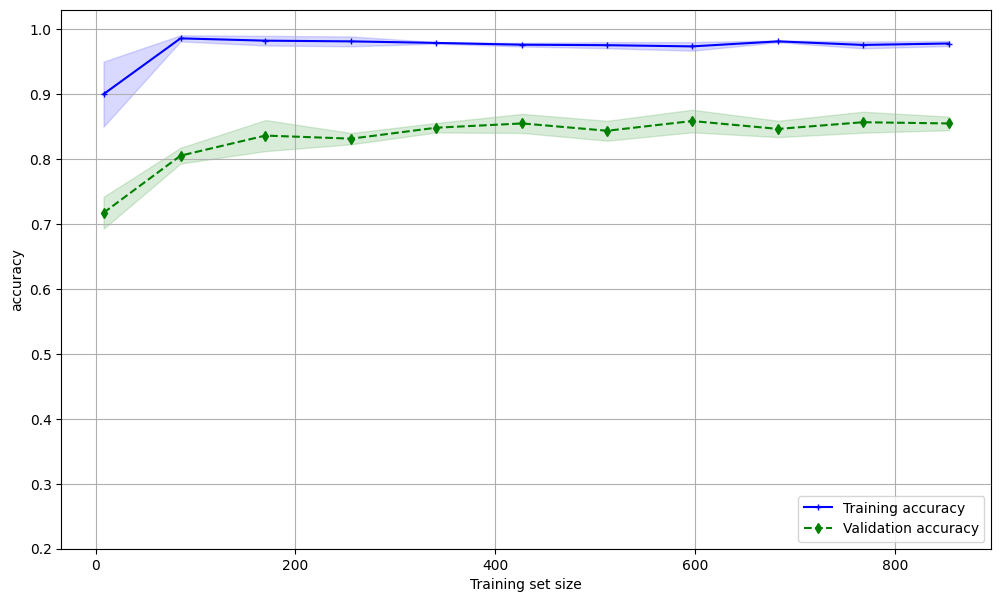

In [23]:
cls = rs_best.best_estimator_
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'accuracy',
                                                       shuffle = False)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.2, 1.03])

(0.2, 1.03)

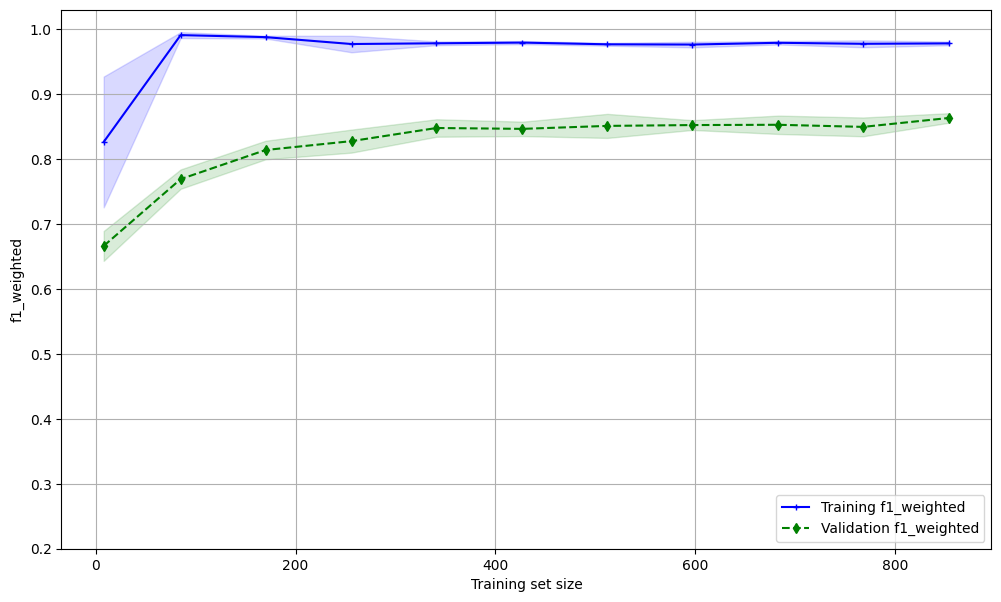

In [24]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1_weighted',
                                                       shuffle = False)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training f1_weighted')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation f1_weighted')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('f1_weighted')
ax.legend(loc='lower right')
ax.set_ylim([0.2, 1.03])

Comments about bias/variance:

when the training and validation curves lie on low percentage values, our model suffers of high bias, meaning that it would be underfitting; one of the main reasons could be a too simple classifier. When, instead, the training and the validation curves stay far from each other even when the training size increases, then our model suffer of high variance, meaning that we have very good performances on training, but on test our model performs poorly. a way to address this could be adding regularisation terms for models like logistic regression. for our specific classifier (randomForest), this problem could be addressed by increasing the number of samples in training dataset or increasing the number of estimators.

In our specific case, we can say that our model is overfitting because there still a considerable difference between training and validation curves, despite the increase of training test size.

## Error analysis 

the error analysis task could be performed by analysing the confusion matrix, which in a binary classification problem is a 2x2 matrix giving the numbers of true positives, true negatives, false positives and false negative.  for a Multiclass problem, like this, we will have a 9x9 matrix where as columns we will have the predicted classes, and as rows we'll have the actual classes. Each cell contains the number of samples predicted as column class and actually belonging to row class. The perfect confusion matrix would have all of its values in the main diagonal, indicating that the model is correctly predicting all of the samples in each class.

In [25]:

conf_matrix = confusion_matrix(y_train, rs_best.best_estimator_.predict(X_train))

since this is hard to visualise we will draw it with matplotlib, and we get a matrix made of tiles. The whiter the tiles are, the greater is the misclassification.

[[ 17]
 [ 11]
 [ 26]
 [  8]
 [154]
 [  8]
 [109]
 [721]
 [ 14]]


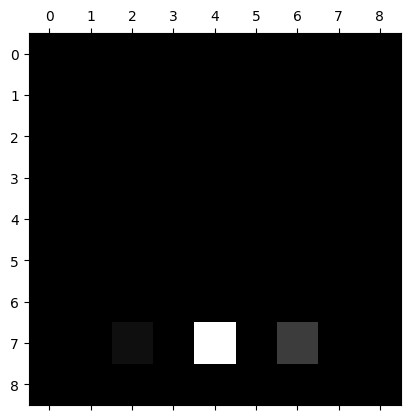

In [26]:
row_sums = conf_matrix.sum(axis=1,keepdims=1)#keepdims per poter effettuare l'operazione nelle celle della matrice
print(row_sums)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix,0)
plt.matshow(norm_conf_matrix, cmap = mlp.cm.gray)
#the whiter the more missclassified

the below code-box is useful to interpret the meaning of the numbers lying on rows [actual classes] and columns [predicted classes].

In [27]:
print('mapping is->',le_name_mapping)


mapping is-> {'Fog': 0, 'Fog , Rain': 1, 'Fog , Rain , Thunderstorm': 2, 'Fog , Thunderstorm': 3, 'Rain': 4, 'Rain , Snow': 5, 'Rain , Thunderstorm': 6, 'SUNNY': 7, 'Thunderstorm': 8}


## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4f45fb6-abad-4b71-b001-b28e61133dee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>